# **Formative Assessment: Unsupervised Learning**

In [56]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

## **Loading and Preprocessing**

In [57]:
#Load the dataset (Iris dataset)
iris = load_iris()

In [58]:
#Dataframe
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# **Clustering Algorithm Implementation**


## **KMeans Clustering**

**K-means clustering is an unsupervised machine learning algorithm used to group similar data points together, where the data is divided into k distinct clusters.**

**It works by iteratively assigning data points to the nearest centroid and then updating the centroids based on the assigned points. This process continues until the clusters converge or a maximum number of iterations is reached.**

**The Iris dataset contains features of flowers that likely form distinct groups, making it suitable for partition-based clustering. KMeans can identify these distinct clusters and group them based on similarity in features like petal length, sepal width, etc.**

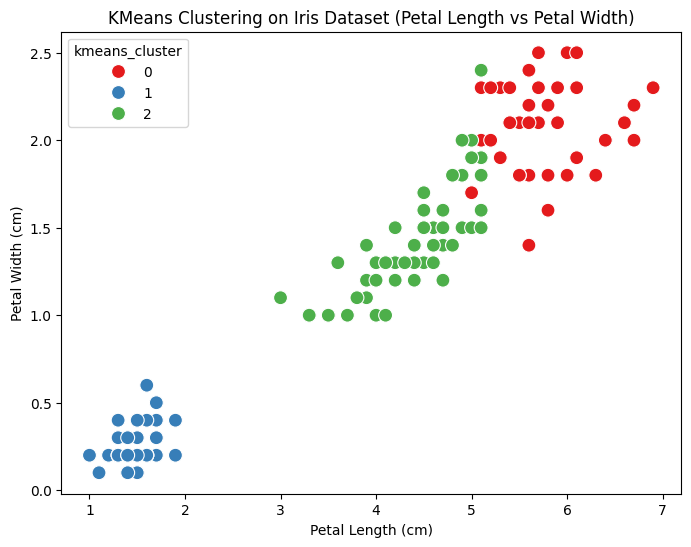

In [59]:
#KMeans clustering
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans_labels = kmeans.fit_predict(df)
df['kmeans_cluster'] = kmeans_labels

plt.figure(figsize = (8, 6))
sns.scatterplot(x = df['petal length (cm)'], y = df['petal width (cm)'], hue = df['kmeans_cluster'], palette = 'Set1', s=100)
plt.title("KMeans Clustering on Iris Dataset (Petal Length vs Petal Width)")
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

## **Hierarchical Clustering**


**Hierarchical clustering is another unsupervised machine learning algorithm used to group similar data points together. It creates a hierarchical structure of clusters, either from the bottom up (agglomerative) or from the top down (divisive).**

**The Iris dataset can also be visualized hierarchically since it may have some natural nesting relationships between species. Hierarchical clustering provides a dendrogram, which can help visualize how clusters are formed step-by-step.**

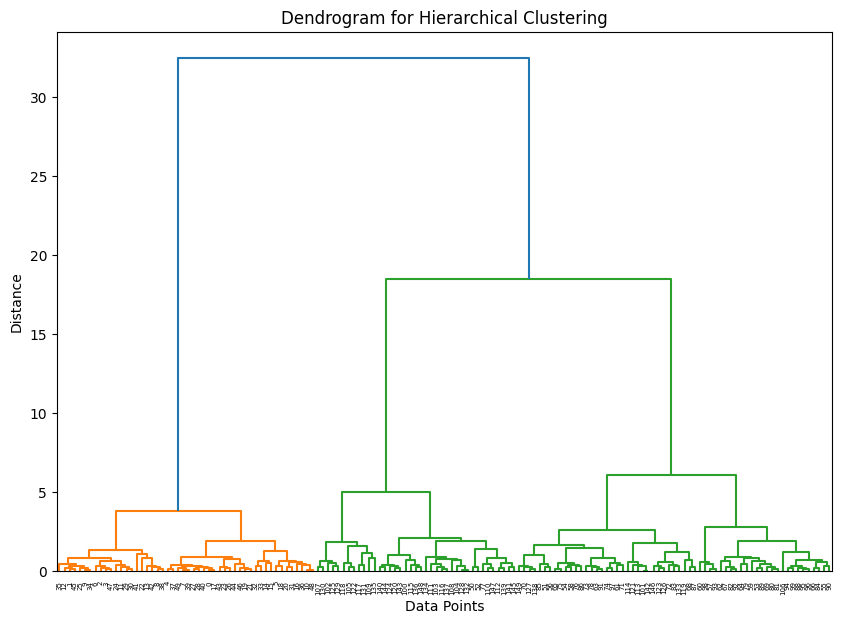

In [60]:
Z = linkage(df, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

hier_clust = AgglomerativeClustering(n_clusters=3)
df['hierarchical_cluster'] = hier_clust.fit_predict(df)

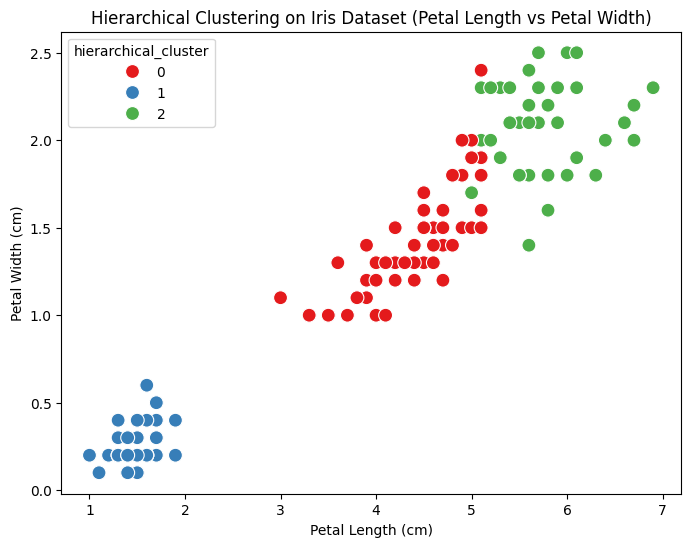

In [61]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = df['petal length (cm)'], y = df['petal width (cm)'], hue = df['hierarchical_cluster'], palette ='Set1', s =100)
plt.title("Hierarchical Clustering on Iris Dataset (Petal Length vs Petal Width)")
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()